# Slide feature

Tutorial on how to use the slice feature.

## Load the data

For the slice the CPT data will be used. The data can be loaded from the pickle file available in the documentation.


In [2]:
import pickle
import numpy as np
import matplotlib.pylab as plt


# read pickle file
with open("../data/cpt_freshEM.pickle", "rb") as fi:
    [cpts, _, _] = pickle.load(fi)

Quick visualisation of the data


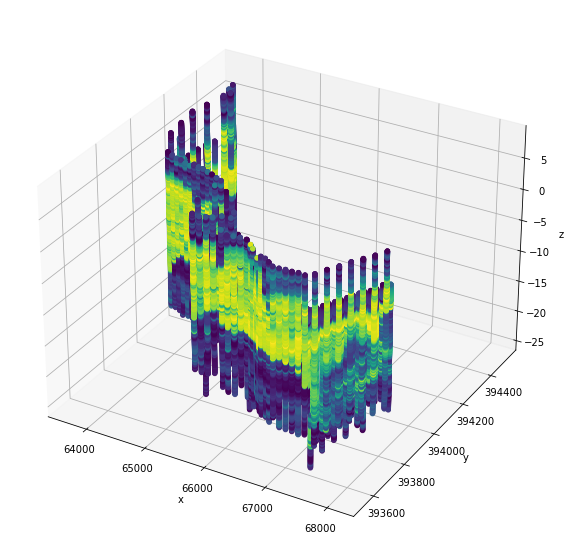

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
for c in cpts:
    values = cpts[c]["IC"]
    ax.scatter(
        np.ones(len(cpts[c]["NAP"])) * cpts[c]["coordinates"][0],
        np.ones(len(cpts[c]["NAP"])) * cpts[c]["coordinates"][1],
        np.array(cpts[c]["NAP"]),
        c=values,
    )
plt.show()

To create the slide first import the datafusion tools packages:

In [4]:
from datafusiontools._core.data_input import Data, Geometry, Variable
from DataFusionTools.interpolation.interpolation_2d_slice import Interpolate2DSlice
from DataFusionTools.interpolation.interpolation import Nearest, InverseDistance, NaturalNeighbor

Transform the CPT data into the data object of datafusion tools

In [5]:
cpts_list = []

for name, item in cpts.items():
    location = Geometry(x=item["coordinates"][0], y=item["coordinates"][1], z=0)
    cpts_list.append(
        Data(
            location=location,
            independent_variable=Variable(value=item["NAP"], label="NAP"),
            variables=[
                Variable(value=item["water"], label="water"),
                Variable(value=item["tip"], label="tip"),
                Variable(value=item["IC"], label="IC"),
                Variable(value=item["friction"], label="friction"),
            ],
        )
    )

Define the line along which to generate the slice.

The interpolation is performed in between location_1 and location_2.

In [6]:
location_1 = Geometry(x=63000, y=394000, z=0)
location_2 = Geometry(x=69000, y=395000, z=0)

Define the interpolator for the slice. 

Different methods are available:

* Natural Neighbor
* Inverse Distance
* Kriging
* ...

In [7]:
interpolator = Interpolate2DSlice()
points_2d_slice, results_2d_slice = interpolator.get_2d_slice_extra(
    location_1=location_1,
    location_2=location_2,
    data=cpts_list,
    interpolate_variable="IC",
    number_of_points=100,
    number_of_independent_variable_points=120,
    interpolation_method=InverseDistance()  # we can define a different interpolator
)

Visualise the results

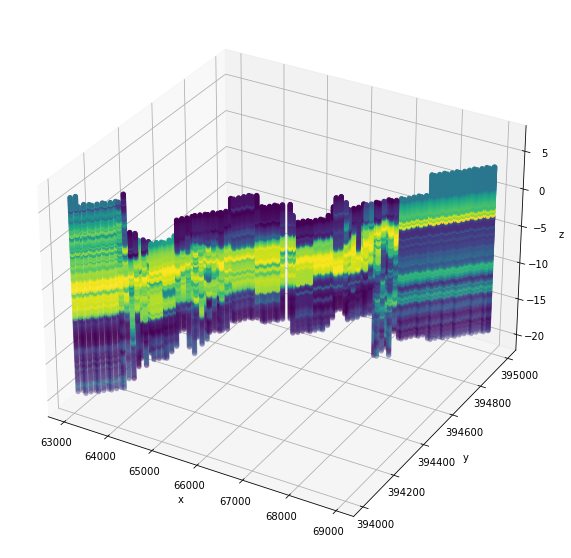

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
for counter, points in enumerate(points_2d_slice):
    values = results_2d_slice[counter]
    ax.scatter(
        np.array(points).T[0],
        np.array(points).T[1],
        np.array(points).T[2],
        c=values,
    )
plt.show()
